## Get dataset

In [2]:
import gspread
import pandas as pd

sa = gspread.service_account(filename='../data/raw/service_account.json')
sh = sa.open('ProyectoDM')

worksheet = sh.sheet1
data = worksheet.get_all_records()
df = pd.DataFrame(data)

In [2]:
renamed_columns = {
    # 'Marca temporal': 'marca_temporal',
    # 'Dirección de correo electrónico': 'correo',
    '¿A qué escuela perteneces?': 'escuela',
    '¿Cuál es tu promedio global? ': 'promedio_global',
    '¿Cuántas materias has reprobado a lo largo de tu trayectoria?': 'materias_reprobadas',
    '¿Qué edad tienes? ': 'edad',
    '¿Cuál es tu género?': 'genero',
    '¿Tienes dependientes económicos?': 'dependientes_economicos',
    '¿Tienes personas a tu cuidado?': 'personas_a_cargo',
    '¿Te sientes apoyado por tu familia?': 'apoyo_familiar',
    '¿Requieres de apoyos económicos (becas) para sostener tus estudios?': 'apoyos_economicos',
    '¿Eres foráneo?': 'foraneo',
    '¿Cuánto tiempo tardas en llegar a tu escuela en minutos?': 'minutos_traslado',
    '¿Cuántas horas diarias dedicas al estudio fuera de clases?': 'horas_estudio',
    'Para validar la lectura de esta encuesta selecciona la opción 3 horas': 'validacion_encuesta',
    '¿Cuántas horas trabajas al día? \nSi no trabajas, escribe \'0\'.': 'horas_trabajo',
    '¿Padeces de alguna enfermedad crónica (Por ejemplo: diabetes, hipertensión, asma, etc.)?': 'enfermedad_cronica',
    '¿Te gusta tu carrera?': 'satisfaccion_carrera',
    '¿Piensas ejercer la carrera?': 'ejercer_carrera',
    '¿Cuántas horas duermes en promedio al día?': 'horas_sueno',
    '¿Con qué frecuencia utilizas herramientas de IA?': 'frecuencia_IA',
}

df.drop(columns=['Marca temporal', 'Dirección de correo electrónico'], inplace=True)
df.rename(columns=renamed_columns, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   escuela                  1833 non-null   object 
 1   promedio_global          1833 non-null   float64
 2   materias_reprobadas      1833 non-null   float64
 3   edad                     1833 non-null   int64  
 4   genero                   1833 non-null   object 
 5   dependientes_economicos  1833 non-null   object 
 6   personas_a_cargo         1833 non-null   object 
 7   apoyo_familiar           1833 non-null   int64  
 8   apoyos_economicos        1833 non-null   object 
 9   foraneo                  1833 non-null   object 
 10  minutos_traslado         1833 non-null   float64
 11  horas_estudio            1833 non-null   float64
 12  validacion_encuesta      1833 non-null   object 
 13  horas_trabajo            1833 non-null   float64
 14  enfermedad_cronica      

In [3]:
# Filter rows with value 3 in validacion_encuesta column and count them
valid_rows = df[df['validacion_encuesta'] == '3 horas']
print(f'[+] Valid rows: {len(valid_rows)}')

# Filter rows with value is not 3 in validacion_encuesta column and count them
invalid_rows = df[df['validacion_encuesta'] != '3 horas']
print(f'[+] Invalid rows: {len(invalid_rows)}')


[+] Valid rows: 1777
[+] Invalid rows: 56


## Categorical to numerical variables

In [4]:
# See values of all columns in the dataframe

for column in df.columns:
    print(f'{column}: {df[column].unique()}\n')

escuela: ['ESCOM' 'ENCB' 'UPIEM' 'EST' 'ESIME' 'ESFM' 'ESIA' 'ESIQIE' 'ESIT']

promedio_global: [ 8.4   6.    7.7   6.4   6.5   7.    7.2   6.2   6.7   6.3   5.8   6.6
  8.2   8.7   8.5   8.8   7.6   7.9   7.1   8.9   9.2   8.6   7.8   7.5
  8.    7.4   8.1   8.3   7.3   9.7   9.    0.    5.7   5.5   5.1   6.1
  6.8   9.4   9.1   5.4   4.6   9.3   5.2   5.    4.5   9.8   9.5   6.9
 10.    9.6   9.9   7.33  8.17  9.27  7.88  9.34  9.19  7.86  8.96  9.14
  9.09  9.59  8.52  7.75  8.55  8.59  7.92  8.86  8.95  8.64  9.04  9.79
  9.52  8.04  7.58  8.03  8.12  8.57  8.41  8.09  7.64  8.87  9.24  8.33
  8.45  8.84  7.45  6.23  4.57  6.58  7.53  9.02  6.33  6.78  7.67  7.77
  8.88  9.01  7.68  6.87  8.21  7.98  9.12  4.2   9.32  9.22  8.15  6.62
  8.51  8.01  9.05  8.98  8.18  7.22  8.65  8.67  8.23  7.93  7.85  8.61
  7.03  9.17  7.91  7.23  6.71  8.05  9.55  9.82  9.18  9.81  9.73  8.53
  8.38  9.07  7.38  7.94  8.82  9.08  9.15  9.33  7.89  3.5   7.42  8.16
  7.66  7.78  8.32  7.41  8.56  

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['escuela'] = label_encoder.fit_transform(df['escuela'])
df['genero'] = label_encoder.fit_transform(df['genero'])
df['dependientes_economicos'] = label_encoder.fit_transform(df['dependientes_economicos'])
df['personas_a_cargo'] = label_encoder.fit_transform(df['personas_a_cargo'])
df['apoyos_economicos'] = label_encoder.fit_transform(df['apoyos_economicos'])
df['foraneo'] = label_encoder.fit_transform(df['foraneo'])
df['validacion_encuesta'] = label_encoder.fit_transform(df['validacion_encuesta'])
df['enfermedad_cronica'] = label_encoder.fit_transform(df['enfermedad_cronica'])
df['satisfaccion_carrera'] = label_encoder.fit_transform(df['satisfaccion_carrera'])
df['ejercer_carrera'] = label_encoder.fit_transform(df['ejercer_carrera'])


In [6]:
# See values of all columns in the dataframe
for column in df.columns:
    print(f'{column}: {df[column].unique()}\n')

escuela: [1 0 8 7 4 2 3 5 6]

promedio_global: [ 8.4   6.    7.7   6.4   6.5   7.    7.2   6.2   6.7   6.3   5.8   6.6
  8.2   8.7   8.5   8.8   7.6   7.9   7.1   8.9   9.2   8.6   7.8   7.5
  8.    7.4   8.1   8.3   7.3   9.7   9.    0.    5.7   5.5   5.1   6.1
  6.8   9.4   9.1   5.4   4.6   9.3   5.2   5.    4.5   9.8   9.5   6.9
 10.    9.6   9.9   7.33  8.17  9.27  7.88  9.34  9.19  7.86  8.96  9.14
  9.09  9.59  8.52  7.75  8.55  8.59  7.92  8.86  8.95  8.64  9.04  9.79
  9.52  8.04  7.58  8.03  8.12  8.57  8.41  8.09  7.64  8.87  9.24  8.33
  8.45  8.84  7.45  6.23  4.57  6.58  7.53  9.02  6.33  6.78  7.67  7.77
  8.88  9.01  7.68  6.87  8.21  7.98  9.12  4.2   9.32  9.22  8.15  6.62
  8.51  8.01  9.05  8.98  8.18  7.22  8.65  8.67  8.23  7.93  7.85  8.61
  7.03  9.17  7.91  7.23  6.71  8.05  9.55  9.82  9.18  9.81  9.73  8.53
  8.38  9.07  7.38  7.94  8.82  9.08  9.15  9.33  7.89  3.5   7.42  8.16
  7.66  7.78  8.32  7.41  8.56  8.97  9.53  8.71  9.41  9.48  8.94  9.45
  9.03  

## Analysis

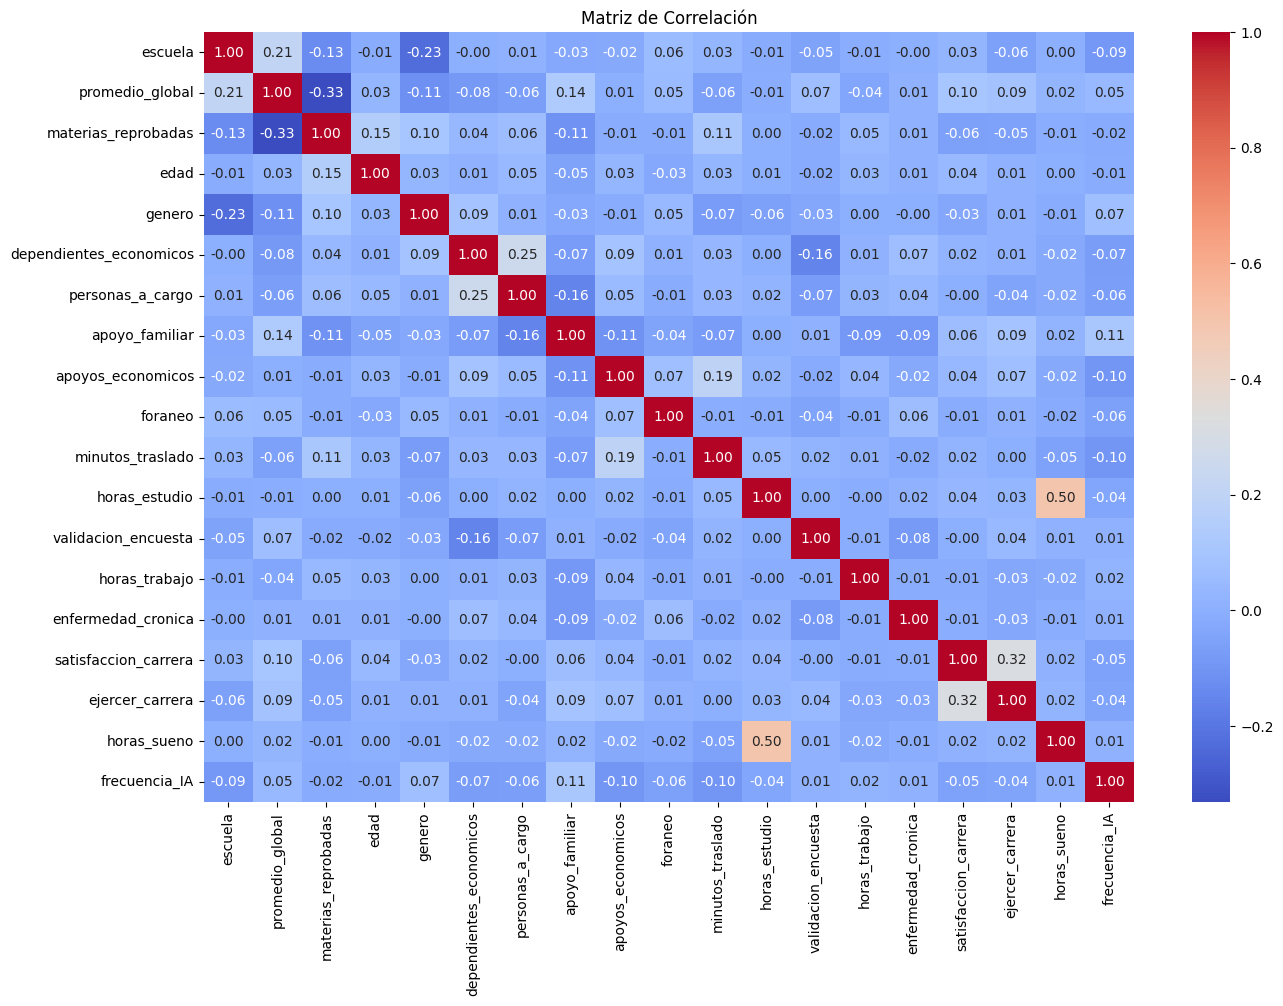

In [7]:
# Matriz de correlación
correlation_matrix = df.corr()

# Visualización (opcional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [8]:
# Analysis of feature importance

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['promedio_global'])
y = df['promedio_global']

model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Show feature importances
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
print(feature_importance.sort_values(by='importance', ascending=False))


                    feature  importance
1       materias_reprobadas    0.215466
2                      edad    0.120038
0                   escuela    0.105486
9          minutos_traslado    0.095163
16              horas_sueno    0.083616
10            horas_estudio    0.083452
17            frecuencia_IA    0.057821
6            apoyo_familiar    0.053496
3                    genero    0.036652
12            horas_trabajo    0.034778
15          ejercer_carrera    0.026575
8                   foraneo    0.021034
14     satisfaccion_carrera    0.017147
7         apoyos_economicos    0.013290
4   dependientes_economicos    0.012843
5          personas_a_cargo    0.010175
13       enfermedad_cronica    0.009440
11      validacion_encuesta    0.003527


In [9]:
# Feature selection

from sklearn.feature_selection import SelectKBest, f_classif

# Select the 5 best features
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# See selected features
selected_features = X.columns[selector.get_support()]
print(selected_features)


Index(['escuela', 'materias_reprobadas', 'apoyo_familiar', 'apoyos_economicos',
       'ejercer_carrera'],
      dtype='object')


## Architecture

In [119]:
import torch
import torch.nn as nn
import torch.optim as optim


class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)    # Capa oculta 1
        self.fc2 = nn.Linear(64, 32)            # Capa oculta 2
        self.fc3 = nn.Linear(32, 16)            # Capa oculta 3
        self.fc4 = nn.Linear(16, 1)             # Capa de salida

    def forward(self, x):
        x = torch.relu(self.fc1(x))          # Activación ReLU en capa 1
        x = torch.relu(self.fc2(x))          # Activación ReLU en capa 2
        x = torch.relu(self.fc3(x))          # Activación ReLU en capa 3
        x = self.fc4(x)                      # Salida continua
        return x

## Training and testing

In [120]:
from sklearn.model_selection import train_test_split

selected_features = ['escuela', 'materias_reprobadas', 'apoyo_familiar', 'apoyos_economicos', 'ejercer_carrera']
X = df[selected_features]
y = df['promedio_global']

X

,escuela,materias_reprobadas,apoyo_familiar,apoyos_economicos,ejercer_carrera
0,1,0.0,5,1,2
1,1,1.0,5,0,2
2,1,0.0,5,0,2
3,1,1.0,5,1,2
4,1,4.0,5,0,2
...,...,...,...,...,...
1828,6,1.0,4,1,1
1829,6,0.0,3,1,2
1830,6,1.0,4,0,2
1831,0,0.0,4,1,2


In [121]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Transform to tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [122]:
input_size = X_train.shape[1]  # Número de características
model = RegressionModel(input_size)

In [123]:
class RMSELoss(nn.Module):
    def __init__(self):
        super(RMSELoss, self).__init__()
        self.mse = nn.MSELoss()

    def forward(self, predictions, targets):
        mse_loss = self.mse(predictions, targets)
        rmse_loss = torch.sqrt(mse_loss)
        return rmse_loss


In [124]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = RMSELoss()

In [125]:
epochs = 3000

best_model = 0

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    train_loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        if epoch == 1:
            best_model = val_loss.item()
        else:
            if val_loss.item() < best_model:
                torch.save(model.state_dict(), 'models/global_average_model.pth')
                best_model = val_loss.item()
                print(f"[+] Model saved in epoch {epoch} with loss: {best_model:.4f}")


[+] Model saved in epoch 2 with loss: 7.8544
[+] Model saved in epoch 3 with loss: 7.8195
[+] Model saved in epoch 4 with loss: 7.7847
[+] Model saved in epoch 5 with loss: 7.7508
[+] Model saved in epoch 6 with loss: 7.7171
[+] Model saved in epoch 7 with loss: 7.6830
[+] Model saved in epoch 8 with loss: 7.6478
[+] Model saved in epoch 9 with loss: 7.6115
[+] Model saved in epoch 10 with loss: 7.5741
[+] Model saved in epoch 11 with loss: 7.5352
[+] Model saved in epoch 12 with loss: 7.4943
[+] Model saved in epoch 13 with loss: 7.4504
[+] Model saved in epoch 14 with loss: 7.4028
[+] Model saved in epoch 15 with loss: 7.3513
[+] Model saved in epoch 16 with loss: 7.2963
[+] Model saved in epoch 17 with loss: 7.2376
[+] Model saved in epoch 18 with loss: 7.1753
[+] Model saved in epoch 19 with loss: 7.1086
[+] Model saved in epoch 20 with loss: 7.0374
[+] Model saved in epoch 21 with loss: 6.9619
[+] Model saved in epoch 22 with loss: 6.8819
[+] Model saved in epoch 23 with loss: 6.7

## Assessment

In [126]:
loaded_model = RegressionModel(5)
loaded_model.load_state_dict(torch.load('models/global_average_model.pth'))

C:\Users\uriel\AppData\Local\Temp\ipykernel_10260\2744811154.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('models/global_avera

<All keys matched successfully>

In [127]:
# Evaluación final en el conjunto de prueba
loaded_model.eval()
with torch.no_grad():
    test_outputs = loaded_model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f'Final Test Loss (RMSE): {test_loss.item()**0.5:.4f}')

Final Test Loss (RMSE): 0.9349


In [128]:
def calculate_metrics(y_true, y_pred):
    mask = y_true != 0
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    mse = torch.mean((y_true - y_pred) ** 2).item()  # MSE
    rmse = mse ** 0.5  # RMSE
    mae = torch.mean(torch.abs(y_true - y_pred)).item()  # MAE
    
    mape = torch.mean(torch.abs((y_true - y_pred) / y_true)).item() * 100 if len(y_true) > 0 else float('nan')

    return mse, rmse, mae, mape

In [129]:
loaded_model.eval()                # Set the model to evaluation mode
with torch.no_grad():
    # Predictions for test set
    test_predictions = loaded_model(X_test)
    
    # Get metrics
    mse, rmse, mae, mape = calculate_metrics(y_test, test_predictions)

print(f"Test Metrics:")
print(f"\tMean Squared Error (MSE): {mse:.4f}")
print(f"\tRoot Mean Squared Error (RMSE): {rmse:.4f}")
print(f"\tMean Absolute Error (MAE): {mae:.4f}")
print(f"\tMean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"\tAcurracy: {100 - mape:.2f}%")

Test Metrics:
	Mean Squared Error (MSE): 0.5449
	Root Mean Squared Error (RMSE): 0.7382
	Mean Absolute Error (MAE): 0.5802
	Mean Absolute Percentage Error (MAPE): 7.60%
	Acurracy: 92.40%


## Testing model

In [130]:
import numpy as np

def preprocess_input(escuela, materias_reprobadas, apoyo_familiar, apoyos_economicos, ejercer_carrera):
    escuela_mapping = {
        'ESCOM': 1, 'ENCB': 0, 'UPIEM': 8, 'EST': 7, 'ESIME': 4,
        'ESFM': 2, 'ESIA': 3, 'ESIQIE': 5, 'ESIT': 6
    }

    apoyos_economicos_mapping = {'Sí': 1, 'No': 0}
    ejercer_carrera_mapping = {'Sí': 2, 'No estoy seguro': 1, 'No': 0}

    # Encode input data
    escuela_encoded = escuela_mapping.get(escuela, -1)  # Return -1 if the key is not found
    apoyos_economicos_encoded = apoyos_economicos_mapping.get(apoyos_economicos, 0)
    ejercer_carrera_encoded = ejercer_carrera_mapping.get(ejercer_carrera, 0)

    # Create input tensor
    input_data = np.array([
        escuela_encoded,
        materias_reprobadas,
        apoyo_familiar,
        apoyos_economicos_encoded,
        ejercer_carrera_encoded
    ])

    return torch.tensor(input_data, dtype=torch.float32)


In [135]:
# Data for prediction
manual_input = preprocess_input(
    escuela='ESCOM',
    materias_reprobadas=0,
    apoyo_familiar=3,
    apoyos_economicos='Sí',
    ejercer_carrera='Sí'
)

manual_input = manual_input.unsqueeze(0)

# model.eval()
loaded_model.eval()

# Make prediction
with torch.no_grad():
    prediction = model(manual_input)

# Show prediction
print(f'Predicted Promedio Global: {prediction.item():.2f}')

Predicted Promedio Global: 8.86
